In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('MagicBricks.csv')

In [3]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [4]:
df.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [6]:
df.shape

(1259, 11)

In [7]:
df.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Locality', 'Parking', 'Price',
       'Status', 'Transaction', 'Type', 'Per_Sqft'],
      dtype='object')

In [8]:
for column in df.columns:
    print(df[column].value_counts())
    print("*"*20)

900.0     67
1500.0    50
1800.0    48
1000.0    42
1600.0    38
          ..
1116.0     1
970.0      1
530.0      1
2316.0     1
2150.0     1
Name: Area, Length: 315, dtype: int64
********************
3     541
2     367
4     220
1      96
5      27
6       6
7       1
10      1
Name: BHK, dtype: int64
********************
2.0    551
3.0    355
1.0    146
4.0    138
5.0     57
6.0      7
7.0      3
Name: Bathroom, dtype: int64
********************
Semi-Furnished    708
Unfurnished       363
Furnished         183
Name: Furnishing, dtype: int64
********************
Lajpat Nagar 3                                                                                                                                                                                                                                                                                                                                                                                                                              

In [9]:
df.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

<AxesSubplot:>

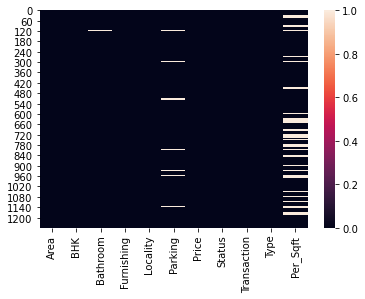

In [10]:
sns.heatmap(df.isnull())

In [11]:
df['Furnishing'].unique()

array(['Semi-Furnished', 'Furnished', 'Unfurnished', nan], dtype=object)

In [12]:
df.drop(['Furnishing','Parking','Type'], axis = 1, inplace =True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Locality     1259 non-null   object 
 4   Price        1259 non-null   int64  
 5   Status       1259 non-null   object 
 6   Transaction  1259 non-null   object 
 7   Per_Sqft     1018 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 78.8+ KB


In [14]:
df['Bathroom'].value_counts()

2.0    551
3.0    355
1.0    146
4.0    138
5.0     57
6.0      7
7.0      3
Name: Bathroom, dtype: int64

In [15]:
df['Bathroom'] = df['Bathroom'].fillna(df['Bathroom'].mode()[0])

<AxesSubplot:>

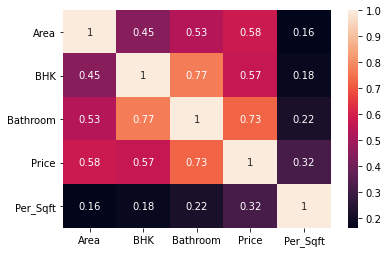

In [16]:
sns.heatmap(df.corr(), annot = True)

<AxesSubplot:>

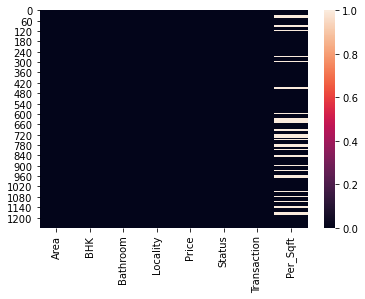

In [17]:
sns.heatmap(df.isnull())

In [18]:
df1 = df.dropna()

<AxesSubplot:>

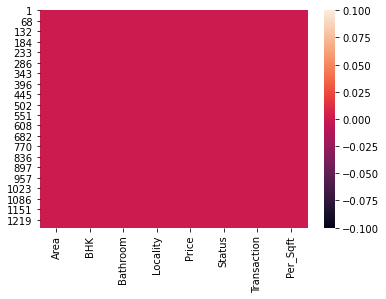

In [19]:
sns.heatmap(df1.isnull())

In [20]:
df1

,Area,BHK,Bathroom,Locality,Price,Status,Transaction,Per_Sqft
1,750.0,2,2.0,"J R Designers Floors, Rohini Sector 24",5000000,Ready_to_move,New_Property,6667.0
2,950.0,2,2.0,"Citizen Apartment, Rohini Sector 13",15500000,Ready_to_move,Resale,6667.0
3,600.0,2,2.0,Rohini Sector 24,4200000,Ready_to_move,Resale,6667.0
4,650.0,2,2.0,Rohini Sector 24 carpet area 650 sqft status R...,6200000,Ready_to_move,New_Property,6667.0
5,1300.0,4,3.0,Rohini Sector 24,15500000,Ready_to_move,New_Property,6667.0
...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Chittaranjan Park,55000000,Ready_to_move,New_Property,12916.0
1255,1050.0,3,2.0,Chittaranjan Park,12500000,Ready_to_move,Resale,12916.0
1256,875.0,3,3.0,Chittaranjan Park,17500000,Ready_to_move,New_Property,12916.0
1257,990.0,2,2.0,Chittaranjan Park Block A,11500000,Ready_to_move,Resale,12916.0


In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1018 entries, 1 to 1258
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1018 non-null   float64
 1   BHK          1018 non-null   int64  
 2   Bathroom     1018 non-null   float64
 3   Locality     1018 non-null   object 
 4   Price        1018 non-null   int64  
 5   Status       1018 non-null   object 
 6   Transaction  1018 non-null   object 
 7   Per_Sqft     1018 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 71.6+ KB


In [22]:
df1['Locality'].value_counts()

J R Designers Floors, Rohini Sector 24                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              31
Lajpat Nagar 2                                                                                                                                                                                                                                                                                                                                                                                                                   

In [23]:
df1['Locality'] = df1['Locality'].apply(lambda x: x.strip())
location_count = df1['Locality'].value_counts()

<ipython-input-23-3a2b36b82bc9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Locality'] = df1['Locality'].apply(lambda x: x.strip())


In [24]:
location_count_less_than_10 = location_count[location_count<=10]
location_count_less_than_10

Rohini Sector 24                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    10
The Leela Sky Villas, Patel Nagar                                                                                                                                                                                                                                                                                                                                                                                                

In [25]:
df1['Locality'] = df['Locality'].apply(lambda x: 'other' if x in location_count_less_than_10 else x)

<ipython-input-25-20ad345f897d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Locality'] = df['Locality'].apply(lambda x: 'other' if x in location_count_less_than_10 else x)


In [26]:
df1['Locality'].value_counts()

other                                                           641
J R Designers Floors, Rohini Sector 24                           31
Kailash Colony, Greater Kailash                                  27
Yamuna Vihar, Shahdara                                           27
Lajpat Nagar 2                                                   27
Chittaranjan Park                                                23
Mehrauli                                                         22
Laxmi Nagar                                                      22
Saket                                                            21
Lajpat Nagar 3                                                   20
Safdarjung Enclave                                               17
The Amaryllis, Karol Bagh                                        17
Alaknanda                                                        16
Common Wealth Games Village, Commonwealth Games Village 2010     15
Sheikh Sarai Phase 1                            

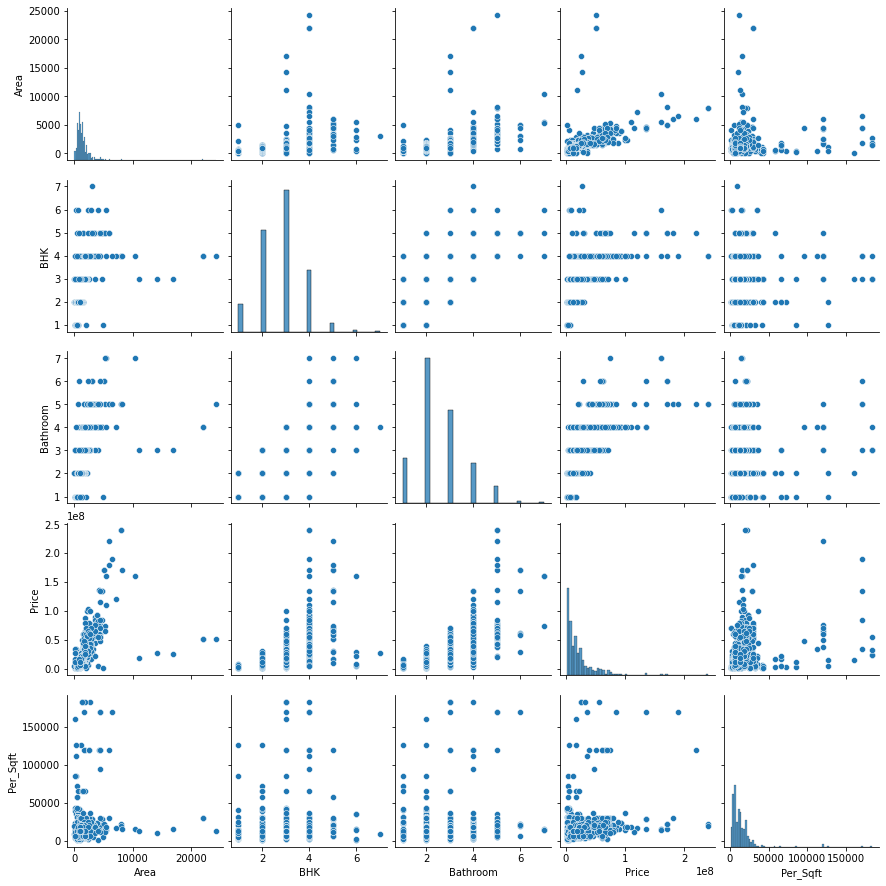

In [27]:
sns.pairplot(df1)

In [28]:
df1.describe()

,Area,BHK,Bathroom,Price,Per_Sqft
count,1018.000000,1018.000000,1018.000000,1.018000e+03,1018.000000
mean,1500.527974,2.797642,2.569745,2.218654e+07,15690.136542
std,1720.908043,0.965641,1.092366,2.760926e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,765.000000,2.000000,2.000000,5.147500e+06,6364.000000
50%,1150.000000,3.000000,2.000000,1.400000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.700000e+07,18000.000000
max,24300.000000,7.000000,7.000000,2.400000e+08,183333.000000


## Removing Outliers

In [29]:
df1.Per_Sqft.describe()

count      1018.000000
mean      15690.136542
std       21134.738568
min        1259.000000
25%        6364.000000
50%       11291.500000
75%       18000.000000
max      183333.000000
Name: Per_Sqft, dtype: float64

In [30]:
def remove_outliers_sqft(df):
    df_output = pd.DataFrame()
    for key, subdf in df.groupby('Locality'):
        m = np.mean(subdf.Per_Sqft)
        
        st = np.std(subdf.Per_Sqft)
        gen_df = subdf[(subdf.Per_Sqft> (m-st)) & (subdf.Per_Sqft <= (m+st))]
        df_output = pd.concat([df_output, gen_df],ignore_index = True)
    return df_output
df1 = remove_outliers_sqft(df1)
df1.describe()

,Area,BHK,Bathroom,Price,Per_Sqft
count,899.000000,899.000000,899.000000,8.990000e+02,899.000000
mean,1495.976198,2.764182,2.531702,2.129105e+07,11804.758621
std,1782.550554,0.961397,1.083304,2.663185e+07,7019.144028
min,28.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,755.000000,2.000000,2.000000,5.000000e+06,6111.000000
50%,1135.000000,3.000000,2.000000,1.350000e+07,10625.000000
75%,1700.000000,3.000000,3.000000,2.570000e+07,15459.000000
max,24300.000000,7.000000,7.000000,2.400000e+08,32000.000000


In [31]:
def bhk_outlier(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('Locality'):
        bhk_stats ={}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] ={
                'mean' : np.mean(bhk_df.Per_Sqft),
                'std' : np.std(bhk_df.Per_Sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.Per_Sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis = 'index')

In [32]:
df1 = bhk_outlier(df1)

In [33]:
df1

,Area,BHK,Bathroom,Locality,Price,Status,Transaction,Per_Sqft
0,1400.0,3,2.0,Alaknanda,19000000,Ready_to_move,Resale,12500.0
1,1100.0,2,2.0,Alaknanda,15000000,Ready_to_move,Resale,12500.0
2,1200.0,2,2.0,Alaknanda,17500000,Ready_to_move,Resale,12500.0
3,1400.0,2,2.0,Alaknanda,14000000,Ready_to_move,Resale,12500.0
4,1320.0,3,2.0,Alaknanda,15600000,Ready_to_move,Resale,12500.0
...,...,...,...,...,...,...,...,...
893,2300.0,4,4.0,other,102500000,Ready_to_move,New_Property,17677.0
894,1200.0,3,3.0,other,22200000,Ready_to_move,New_Property,18333.0
895,2430.0,4,4.0,other,30000000,Ready_to_move,Resale,18333.0
897,1800.0,3,3.0,other,26000000,Ready_to_move,Resale,12916.0


In [34]:
df1.shape

(594, 8)

In [35]:
df1.drop(['Status','Transaction'], axis =1, inplace =True)

In [36]:
df1.head()

,Area,BHK,Bathroom,Locality,Price,Per_Sqft
0,1400.0,3,2.0,Alaknanda,19000000,12500.0
1,1100.0,2,2.0,Alaknanda,15000000,12500.0
2,1200.0,2,2.0,Alaknanda,17500000,12500.0
3,1400.0,2,2.0,Alaknanda,14000000,12500.0
4,1320.0,3,2.0,Alaknanda,15600000,12500.0


In [37]:
df1.to_csv("cleaned_data.csv")

In [38]:
X = df1.drop(['Price'], axis = 1)
y = df1['Price']

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size =0.3,random_state = 0)

In [41]:
print(X_train.shape)
print(y_train.shape)

(415, 5)
(415,)


In [42]:
X_test

,Area,BHK,Bathroom,Locality,Per_Sqft
269,720.0,2,1.0,"Yamuna Vihar, Shahdara",5556.0
147,540.0,2,1.0,Laxmi Nagar,11667.0
631,2700.0,4,4.0,other,12500.0
101,1350.0,2,2.0,Lajpat Nagar 2,9259.0
188,4500.0,4,4.0,New Friends Colony,23529.0
...,...,...,...,...,...
879,4500.0,4,4.0,other,30000.0
232,1300.0,2,2.0,Sheikh Sarai Phase 1,12307.0
272,360.0,1,1.0,"Yamuna Vihar, Shahdara",6944.0
505,1100.0,2,2.0,other,21818.0


## Applying Linear Regression

In [43]:
location_trans = make_column_transformer((OneHotEncoder(sparse = False),['Locality']), remainder = 'passthrough')

In [44]:
scaler = StandardScaler()

In [45]:
lr = LinearRegression(normalize = True)

In [46]:
pipe = make_pipeline(location_trans, scaler, lr)

In [47]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['Locality'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression(normalize=True))])

In [48]:
y_pred_lr = pipe.predict(X_test)

In [49]:
r2_score(y_test, y_pred_lr)

0.5821799088099524

## Applying Lasso

In [50]:
lasso = Lasso()

In [51]:
pipe = make_pipeline(location_trans, scaler, lasso)

In [52]:
pipe.fit(X_train, y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6255611744261064.0, tolerance: 31957206932144.582
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['Locality'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [53]:
y_pred_lasso = pipe.predict(X_test)


In [54]:
r2_score(y_test, y_pred_lasso)

0.5878344732721795

## Applying Ridge

In [55]:
ridge = Ridge()

In [56]:
pipe = make_pipeline(location_trans, scaler, ridge)

In [57]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['Locality'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [58]:
y_pred_ridge = pipe.predict(X_test)

In [59]:
r2_score(y_test, y_pred_ridge)

0.5883420760563073

## Applying RandomForestRegressor

In [60]:
location_trans = make_column_transformer((OneHotEncoder(sparse = False),['Locality']), remainder = 'passthrough')

In [61]:
scaler = StandardScaler()

In [62]:
rfr = RandomForestRegressor()

In [63]:
pipe = make_pipeline(location_trans, scaler, rfr)

In [64]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['Locality'])])),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [65]:
y_pred_rfr = pipe.predict(X_test)

In [66]:
X_train

,Area,BHK,Bathroom,Locality,Per_Sqft
205,1600.0,3,3.0,Safdarjung Enclave,14818.0
539,1600.0,3,3.0,other,18750.0
581,600.0,2,2.0,other,14818.0
156,750.0,2,2.0,Malviya Nagar,14888.0
884,1800.0,3,4.0,other,18055.0
...,...,...,...,...,...
395,2900.0,5,5.0,other,22222.0
9,1200.0,2,2.0,Alaknanda,12500.0
547,450.0,2,1.0,other,13333.0
211,1650.0,3,3.0,Safdarjung Enclave,14818.0


In [67]:
r2_score(y_test, y_pred_rfr)

0.8301029413893924

## Applying XGBRegressor

In [68]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [69]:
from xgboost import XGBRegressor

In [70]:
xgbr = XGBRegressor()

In [71]:
pipe = make_pipeline(location_trans, scaler, xgbr)

In [72]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['Locality'])])),
                ('standardscaler', StandardScaler()),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=8, num_parallel_tree=

In [73]:
y_pred_xgbr = pipe.predict(X_test)

In [74]:
y_pred_xgbr

array([6.2519185e+06, 6.1948840e+06, 4.7795736e+07, 1.8564496e+07,
       9.8429456e+07, 4.1259172e+07, 2.2880258e+07, 1.2255783e+08,
       8.0644208e+07, 1.7498506e+07, 1.9688868e+07, 7.2579655e+06,
       2.0579740e+07, 9.2300088e+07, 1.1849536e+07, 1.1050199e+07,
       7.0417445e+06, 6.9828925e+06, 3.3514448e+06, 5.2940196e+07,
       1.9559282e+07, 2.5202210e+07, 2.9109314e+07, 9.8429456e+07,
       9.8406970e+06, 1.6999410e+08, 2.7248082e+07, 1.3021433e+07,
       1.6796692e+07, 1.9532548e+07, 1.8675608e+07, 3.6009832e+07,
       5.7158272e+07, 1.2413381e+07, 1.6038529e+07, 3.0201320e+06,
       1.3021433e+07, 1.9269286e+07, 1.9252254e+07, 2.2980556e+07,
       6.9672528e+07, 2.0683574e+07, 3.4900312e+07, 2.7852962e+07,
       1.6294758e+07, 2.2954205e+06, 1.9388592e+08, 7.6644840e+06,
       6.0374625e+06, 5.5532624e+07, 1.3633110e+06, 5.8983108e+07,
       2.2737378e+07, 1.8049870e+07, 2.3939016e+08, 2.0669590e+06,
       2.0130548e+07, 5.6622088e+07, 2.8144162e+06, 2.6856156e

In [75]:
r2_score(y_test, y_pred_xgbr)

0.8284195903709087

## Overall scores of all models

In [76]:
models = [
    LinearRegression(),
    Lasso(),
    Ridge(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    XGBRegressor()
]
model_names = [
    'LinearRegression',
    'Lasso',
    'Ridge',
    'KNeighborsRegressor',
    'DecisionTreeRegressor',
    'RandomForestRegressor',
    'XGBRegressor']

score = []
dictionary = {}
for model in range(len(models)):
    location_trans = make_column_transformer((OneHotEncoder(sparse = False),['Locality']), remainder = 'passthrough')
    scaler = StandardScaler()
    reg = models[model]
    pipe = make_pipeline(location_trans, scaler, reg)
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)
    score.append(r2_score(y_test,y_pred))
     
dictionary = {'Model Names':model_names,'R2 Score': score}
# Put the accuracies in a data frame.
score_df = pd.DataFrame(dictionary)
score_df.style.set_precision(5)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6255611744261064.0, tolerance: 31957206932144.582
  model = cd_fast.enet_coordinate_descent(


,Model Names,R2 Score
0,LinearRegression,0.58986
1,Lasso,0.58783
2,Ridge,0.58834
3,KNeighborsRegressor,0.72572
4,DecisionTreeRegressor,0.75822
5,RandomForestRegressor,0.83577
6,XGBRegressor,0.82842


In [77]:
import pickle

In [78]:
pickle.dump(pipe, open('RandomForestModel.pkl','wb'))

In [80]:
model = pickle.load(open('RandomForestModel.pkl','rb'))

In [81]:
model.predict(pd.DataFrame(data= [(2000, 3, 2, 'Alaknanda',55560.0)],columns = ['Area','BHK','Bathroom','Locality','Per_Sqft']))[0]

37877412.0